In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('dataFinal.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB
None


In [4]:
print(df.dtypes)

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [5]:
df['Дата'] = pd.to_datetime(df['Дата'])

In [6]:
print(df['Дата'].head())

0   2018-01-04
1   2018-01-04
2   2018-01-04
3   2018-01-04
4   2018-01-04
Name: Дата, dtype: datetime64[ns]


Сгруппируйте данные по дате, посчитайте количество продаж

In [7]:
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()

Вывести несколько первых строк сгруппированных данных

In [10]:
print(grouped_df.head())

        Дата  Количество
0 2018-01-04        3734
1 2018-01-05        3643
2 2018-01-06        3193
3 2018-01-07        3298
4 2018-01-09        4055


Нарисуйте график продаж у `grouped_df`

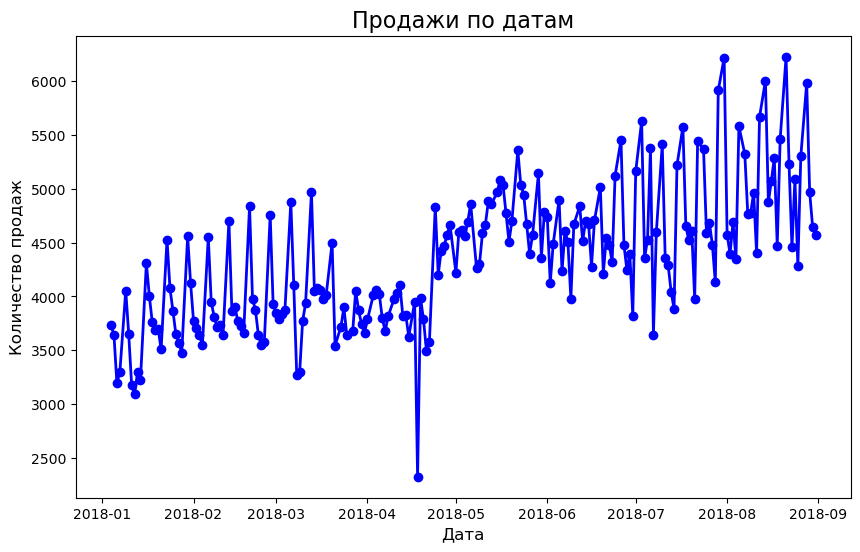

In [13]:
plt.figure(figsize=(10, 6))

plt.plot(grouped_df['Дата'], grouped_df['Количество'], marker='o', color='b', linestyle='-', linewidth=2)

# Заголовок и подписи к осям
plt.title('Продажи по датам', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество продаж', fontsize=12)

plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

#### График отображает динамику продаж с января по август 2018 года. В начале года (январь-февраль) наблюдается стабильный уровень продаж с небольшими колебаниями. В марте и апреле количество продаж начинает постепенно расти. Однако в апреле есть и периоды снижения продаж.
#### С мая наблюдается резкое увеличение продаж, что может быть связано с сезонным ростом активности покупателей. Максимальные значения продаж достигаются в июле и августе. 
#### В целом, график демонстрирует сезонность с повышением продаж в летние месяцы и некоторыми спадами в более холодное время года, например, в апреле. Это свидетельствует о регулярных колебаниях спроса и возможной связи с внешними факторами.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [29]:
# Квартили
Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)

# Межквартильный размах (IQR)
IQR = Q3 - Q1

# Верхние и нижние границы выбросов
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Находим все строки, которые выходят за пределы границ
outliers = df[(df['Количество'] < lower_limit) | (df['Количество'] > upper_limit)]

# Находим строку с максимальным выбросом
max_outlier = outliers.sort_values(by='Количество', ascending=False).head(1)

# Вывод
print(max_outlier)

             Дата  Склад   Контрагент Номенклатура  Количество
218822 2018-06-28      1  address_208    product_0         200


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [32]:
# Фильтруем данные по нужным нам месяцам (июнь, июль, август)
month = df[df['Дата'].dt.month.isin([6, 7, 8])]

# День: среда
wednesday = month[month['Дата'].dt.weekday == 2]

# Фильтруем данные по складам (3 склад)
storage = wednesday[wednesday['Склад'] == 3]

# Группируем данные по товару и суммируем количество продаж
top_sales = storage.groupby('Номенклатура').agg({'Количество': 'sum'}).reset_index()

# Находим топовый товар по продажам
top_product = top_sales.loc[top_sales['Количество'].idxmax()]

product_name = top_product['Номенклатура']
product_quantity = top_product['Количество']

# Вывод
print(f"Топовый товар по продажам по средам за июнь, июль, август у 3 склада: {product_name}, в количестве — {product_quantity}")

Топовый товар по продажам по средам за июнь, июль, август у 3 склада: product_1, в количестве — 2267


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [71]:
weather_df = pd.read_csv('Temperature.csv', encoding='cp1251')
weather_df.head()

,Дата,T
0,2018-08-31,8.2
1,2018-08-31,9.6
2,2018-08-31,11.3
3,2018-08-31,12.3
4,2018-08-31,13.2


In [72]:
print(weather_df.dtypes)

Дата     object
T       float64
dtype: object


In [73]:
weather_df['Дата'] = pd.to_datetime(weather_df['Дата'])

In [74]:
# Группируем по дате и находим среднюю температуру:
weather_mean = weather_df.groupby('Дата').agg({'T': 'mean'}).reset_index()

In [75]:
# Объединяем с grouped_df
merged_df = pd.merge(grouped_df, weather_mean, on='Дата', how='inner')

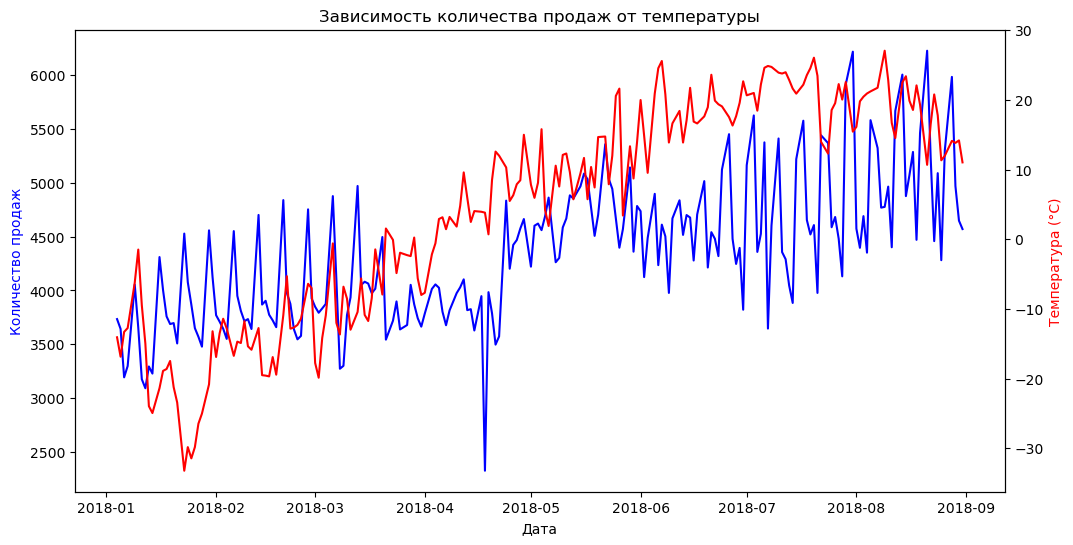

In [76]:
# Строим графики
fig, ax1 = plt.subplots(figsize=(12, 6))

# Количество продаж (слева)
ax1.plot(merged_df['Дата'], merged_df['Количество'], color='blue', label='Количество продаж')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество продаж', color='blue')

# Температура (справа)
ax2 = ax1.twinx()
ax2.plot(merged_df['Дата'], merged_df['T'], color='red', label='Температура')
ax2.set_ylabel('Температура (°C)', color='red')

plt.title('Зависимость количества продаж от температуры')
plt.show()

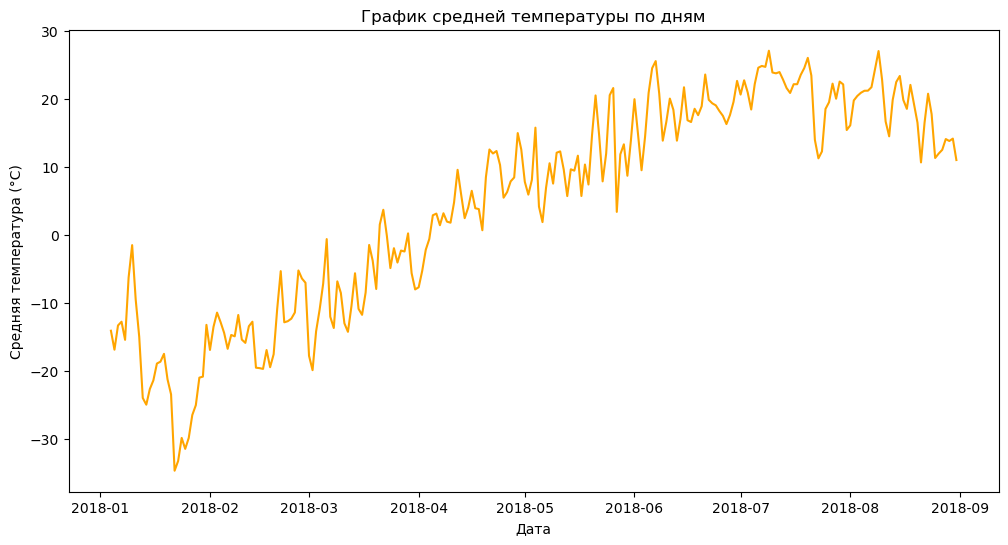

In [77]:
# График температуры по дням
plt.figure(figsize=(12, 6))
plt.plot(weather_mean['Дата'], weather_mean['T'], color='orange')
plt.xlabel('Дата')
plt.ylabel('Средняя температура (°C)')
plt.title('График средней температуры по дням')

plt.show()